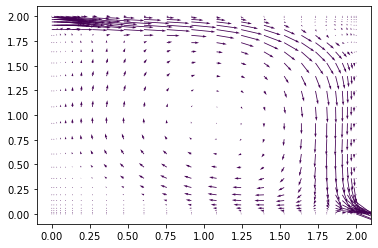

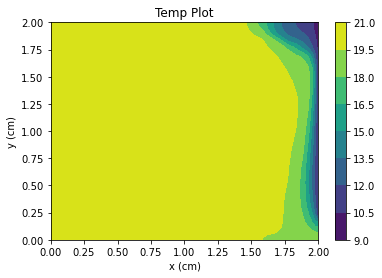

In [24]:
import numpy as np
import copy as copy
import matplotlib.pyplot as plt
from scipy.linalg import norm
import math 
import matplotlib.gridspec as gridspec
from scipy.interpolate import interp2d
#-----------Loding File-------------------
f1=open("xc.dat",'r')
f2=open("yc.dat")
f3=open("u.dat")
f4=open("v.dat")
#--------Read File X and Y............................
xc=f1.readlines()
xc = list(map(float, xc))
xc=np.array(xc)
nim1=len(xc)                      #26
ni=nim1+1                         #27                                           

yc=f2.readlines()
yc = list(map(float, yc))
yc=np.array(yc)
njm1=len(yc)                      #26
nj=njm1+1                         #27
#-----------Read File U and V in cell center----------------
u1=f3.readlines()
u1 = list(map(float, u1))
u2d=np.reshape(u1,(ni,nj)) #27*27
u2d=np.array(u2d)
u2d=u2d.transpose()

v1=f4.readlines()
v1 = list(map(float, v1))
v2d=np.reshape(v1,(ni,nj)) #27*27
v2d=np.array(v2d)
v2d=v2d.transpose()
#-------Calculate Xp and Yp node Value--------------------------
xp= np.ones(ni)
for i in range(1,nim1):
    xp[i]=0.5*(xc[i]+xc[i-1])
xp[0]=xc[0]
xp[-1]=xc[-1]

yp= np.ones(nj)
for i in range(1,njm1):
    yp[i]=0.5*(yc[i]+yc[i-1])
yp[0]=yc[0]
yp[-1]=yc[-1]
#................Plot velocity at the cell center(node).....................
# plt.quiver(xp,yp,u2d,v2d,9)
# plt.savefig("output1.png",dpi=600)
# plt.show()
#----------------------velocity at the faces-------------------
Nx=ni-2    #number of cell
Ny=nj-2
u=np.zeros((nim1,njm1),dtype=np.float32)
v=np.zeros((nim1,njm1),dtype=np.float32)
for i in range(1,ni-1):
    for j in range(1,nj-1):
        u[i][j]=0.5*(u2d[i][j-1]+u2d[i][j])
        #u[i][j]=u2d[i][j-1]+(u2d[i,j]-u2d[i,j-1])*(xc[i]-xp[i])/(xp[i]-xp[i-1]);
for i in range(0,nim1):
    u[i][0]=u2d[i+1][0]
    u[i][-1]=u2d[i+1][-1]
for i in range(1,ni-1):
    for j in range(1,nj-1):
        v[i][j]=0.5*(v2d[i-1][j]+v2d[i][j])
        #v[i][j]=v2d[i-1][j]+(v2d[i][j]-v2d[i-1][j])*(yc[j]-yp[j])/(yp[j+1]-yp[j]);
for i in range(0,nim1):
    v[i][0]=v2d[i+1][0]
    v[i][-1]=v2d[i+1][-1]
#................Plot velocity at the face center(node).....................    
plt.quiver(xc,yc,u,v,9)
plt.savefig("output2.png",dpi=600)  
plt.show()
#----------------parameter define------------------------------------ 
gamma=1/500 #k_by_cp
rho=1
Key=0
epc=10**(-5)
residu=[]
itaration=[]
count=0
T_0=np.ones((ni,nj),dtype=np.float32)
T=np.ones((ni,nj),dtype=np.float32)
#..................defineboundary condition----------

for i in range(0,ni):
        if(yc[i-1]>=1.8):#1.864
            T[i][0]=20
        if(yc[i-1]>=0.136):
            T[i][-1]=10
#------------------equation loop-----------------------------------                
while(Key==0):    
    for i in range(1,ni-1):
        for j in range(1,nj-1):
            Fw=rho*u[i][j-1]*(yc[i]-yc[i-1]);  Dw=(gamma*(yc[i]-yc[i-1]))/(xp[j]-xp[j-1])
            Fe=rho*u[i][j]*(yc[i]-yc[i-1]);    De=(gamma*(yc[i]-yc[i-1]))/(xp[j+1]-xp[j])
            Fs=rho*v[i-1][j]*(xc[j]-xc[j-1]);  Ds=(gamma*(xc[j]-xc[j-1]))/(yp[i]-yp[i-1])
            Fn=rho*v[i][j]*(xc[j]-xc[j-1]);    Dn=(gamma*(xc[j]-xc[j-1]))/(yp[i+1]-yp[i])
            Aw=max(Fw,(Dw+Fw/2),0); As=max(Fs,(Ds+Fs/2),0)
            Ae=max(-Fe,(De-Fe/2),0);An=max(-Fn,(Dn-Fn/2),0)
            Ap=Aw+Ae+An+As
            T[i][j]=(Ae*T[i][j+1]+Aw*T[i][j-1]+An*T[i+1][j]+As*T[i-1][j])/Ap
            #Boundaries Update for Newmann
    for i in range(0,ni):
        if(yc[i-1]<=0.136):
            T[i,-1]=T[i,-2]
        if(yc[i-1]<=1.864):
            T[i,0]=T[i,1]
    for j in range(0,ni):
        T[0,j] = T[1,j]
        T[-1,j] = T[-2,j]
    count=count+1
    #print(count)
    itaration.append(count)            #itaration[j]=count
    #R[j]=(norm(T-T_0))/len(T)
    R=(norm(T-T_0))/len(T)
    residu.append(R)
    if(R<epc):
        Key=1
    T_0=copy.copy(T)
[X,Y]=np.meshgrid(xp,yp) #to view temp plot
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, T)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Temp Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.savefig("output2.png",dpi=600)
plt.show()

In [19]:
T

array([[18.976225 , 18.976225 , 18.988157 , 19.00711  , 19.034689 ,
        19.072514 , 19.122425 , 19.18736  , 19.271889 , 19.375607 ,
        19.473633 , 19.524746 , 19.531115 , 19.52314  , 19.510614 ,
        19.49399  , 19.472837 , 19.445557 , 19.40676  , 19.337997 ,
        19.207123 , 19.122643 , 19.062735 , 19.015886 , 18.975243 ,
        18.888067 , 18.888067 ],
       [18.976225 , 18.976225 , 18.988157 , 19.00711  , 19.034689 ,
        19.072514 , 19.122425 , 19.18736  , 19.271889 , 19.375607 ,
        19.473633 , 19.524746 , 19.531115 , 19.52314  , 19.510614 ,
        19.49399  , 19.472837 , 19.445557 , 19.40676  , 19.337997 ,
        19.207123 , 19.122643 , 19.062735 , 19.015886 , 18.975243 ,
        18.888067 , 18.888067 ],
       [18.988905 , 18.988905 , 19.00062  , 19.019224 , 19.046278 ,
        19.08335  , 19.132235 , 19.19586  , 19.278858 , 19.380917 ,
        19.477194 , 19.526854 , 19.53256  , 19.524488 , 19.51207  ,
        19.495699 , 19.4749   , 19.448082 , 19.410